<a href="https://colab.research.google.com/github/ifanapridarahman/Pejuang_Data_3/blob/main/Mini_Project_Kelas_Dasar_Ifan_Aprida_Rahman_2000015004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAST 30 DAY - EARTHQUAKE






##Latar Belakang Dataset

Gempa bumi adalah getaran asli dari dalam bumi, bersumber di dalam bumi yang kemudian merambat ke permukaan bumi akibat rekahan bumi pecah dan bergeser dengan keras. Penyebab gempa bumi dapat berupa dinamika bumi (tektonik), aktivitas gunungapi, akibat meteor jatuh, longsoran (di bawah muka air laut), ledakan bom nuklir di bawah permukaan. Gempa bumi tektonik merupakan gempa bumi yang paling umum terjadi merupakan getaran yang dihasilkan dari peristiwa pematahan batuan akibat benturan dua lempeng secara perlahan-lahan itu yang akumulasi energi benturan tersebut melampaui kekuatan batuan, maka batuan di bawah permukaan

Dalam dataset LAST 30 DAY - EARTHQUAKE ini menyajikan data mengenai 30 hari setelah terjadinya gempa bumi

## Pertanyaan Analisis

Apa yang terjadi setelah 30 hari terjadinya gempa bumi berdasarkan keyword yang ada ?

##EDA (Exploratory Data Analysis)

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Mengakses Dataset

In [ ]:
df = pd.read_csv('/content/LAST_30_DAYS_EARTHQUAKES.csv')
df.head() 

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-10-24T07:46:44.980Z,38.160000,-118.209000,4.20,0.60,ml,9.0,171.25,0.12300,0.0948,nn,nn00826538,2021-10-24T07:50:24.747Z,"27 km SSW of Mina, Nevada",earthquake,NaN,36.00,0.37,5.0,automatic,nn,nn
1,2021-10-24T07:43:48.041Z,62.121600,-149.380700,13.80,2.50,ml,NaN,NaN,NaN,0.7300,ak,ak021dnb1ff9,2021-10-24T07:52:56.691Z,"24 km E of Susitna North, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2021-10-24T07:41:52.946Z,59.051800,-137.918900,2.60,2.20,ml,NaN,NaN,NaN,0.4500,ak,ak021dnb10ce,2021-10-24T07:48:15.762Z,"115 km WSW of Covenant Life, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
3,2021-10-24T07:15:04.860Z,36.826168,-121.425667,10.15,1.54,md,20.0,169.00,0.06291,0.1300,nc,nc73643975,2021-10-24T07:32:13.583Z,"3km SW of Hollister, CA",earthquake,0.67,0.74,0.16,14.0,automatic,nc,nc
4,2021-10-24T07:09:17.330Z,19.413834,-155.263840,3.16,1.71,ml,12.0,70.00,NaN,0.0600,hv,hv72767687,2021-10-24T07:14:48.460Z,"4 km SW of Volcano, Hawaii",earthquake,0.31,0.41,0.28,3.0,automatic,hv,hv


#**Eksploratory Data Analysis**

###Dimensi Data

In [ ]:
df.shape

(9983, 22)

Berarti data di atas mempunyai 22 kolom dan 9983 baris

###Variabel Pada Dataset

In [ ]:
df.columns.values

array(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'], dtype=object)

In [ ]:
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9983 non-null   object 
 1   latitude         9983 non-null   float64
 2   longitude        9983 non-null   float64
 3   depth            9983 non-null   float64
 4   mag              9982 non-null   float64
 5   magType          9982 non-null   object 
 6   nst              7291 non-null   float64
 7   gap              8262 non-null   float64
 8   dmin             6943 non-null   float64
 9   rms              9983 non-null   float64
 10  net              9983 non-null   object 
 11  id               9983 non-null   object 
 12  updated          9983 non-null   object 
 13  place            9983 non-null   object 
 14  type             9983 non-null   object 
 15  horizontalError  7215 non-null   float64
 16  depthError       9982 non-null   float64
 17  magError      

Kita dapat mengetahui tipe-tipe data masing-masing variabel dan nama-nama variabel dalam dataset

###Mengecek Missing Data

In [ ]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2692
gap                1721
dmin               3040
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2768
depthError            1
magError           2126
magNst             1729
status                0
locationSource        0
magSource             0
dtype: int64

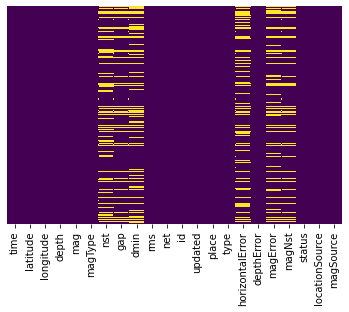

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Kolom-kolom dengan data kosong adalah: nst, gap, dmin, horizontalError, magError, dan magNst

###Mengecek Outlier

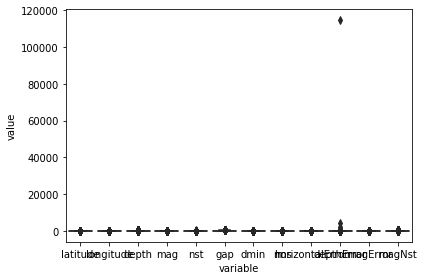

In [ ]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

Semua kolom numeric memiliki outlier

###Melihat Korelasi Data

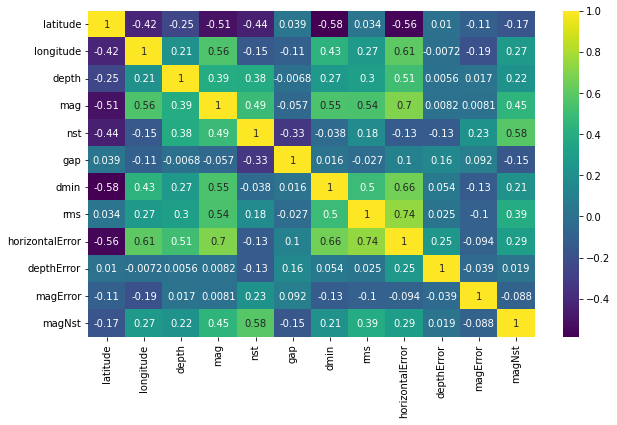

In [ ]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

###Melihat Statistik Data

In [ ]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9983.000000,9983.000000,9983.000000,9982.000000,7291.000000,8262.000000,6943.000000,9983.000000,7215.000000,9982.000000,7857.000000,8254.000000
mean,37.411009,-114.448026,21.385993,1.640972,20.191606,117.573092,0.576655,0.272199,1.601460,14.904706,0.298255,14.016840
std,19.028062,58.808997,53.005091,1.172361,15.250876,59.682726,2.017148,0.295483,3.071566,1151.328772,0.519390,27.330316
min,-62.918000,-179.981800,-3.490000,-1.740000,0.000000,12.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.640833,-149.677200,2.630000,0.860000,10.000000,72.000000,0.021000,0.090000,0.270000,0.450000,0.111000,4.000000
50%,38.499300,-119.631600,7.700000,1.430000,15.000000,105.000000,0.057400,0.140900,0.480000,0.770000,0.173407,7.000000
75%,45.361750,-115.732250,16.600000,2.040000,26.000000,149.912500,0.154650,0.360000,0.940000,1.560000,0.263000,15.000000
max,85.512500,179.947500,655.670000,7.300000,227.000000,355.580000,40.259000,4.460000,54.620000,114909.100000,5.420000,600.000000


###Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

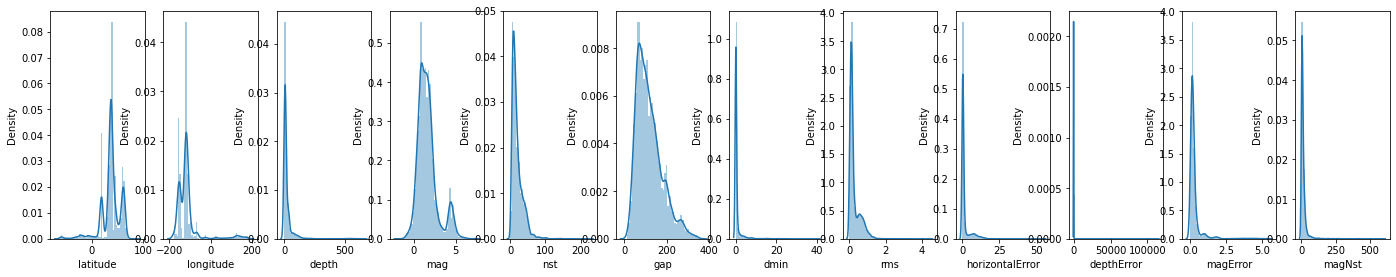

In [ ]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Plot ini untuk melihat apakah variabel-variabel pada dataset berdistribusi normal. Variabel-variabel longitude, depth, mag, nst, dmin, rms,horizontalError, depthError, magError, dan magNst cenderung memiliki skewnes positif. Itu berarti berarti ekor distribusi berada di sebelah kanan nilai terbanyak.

Apa itu Skewnes dan Kurtosis? https://thomassoseco.blogspot.com/2019/02/skewness-dan-kurtosis.html

###Pairplot

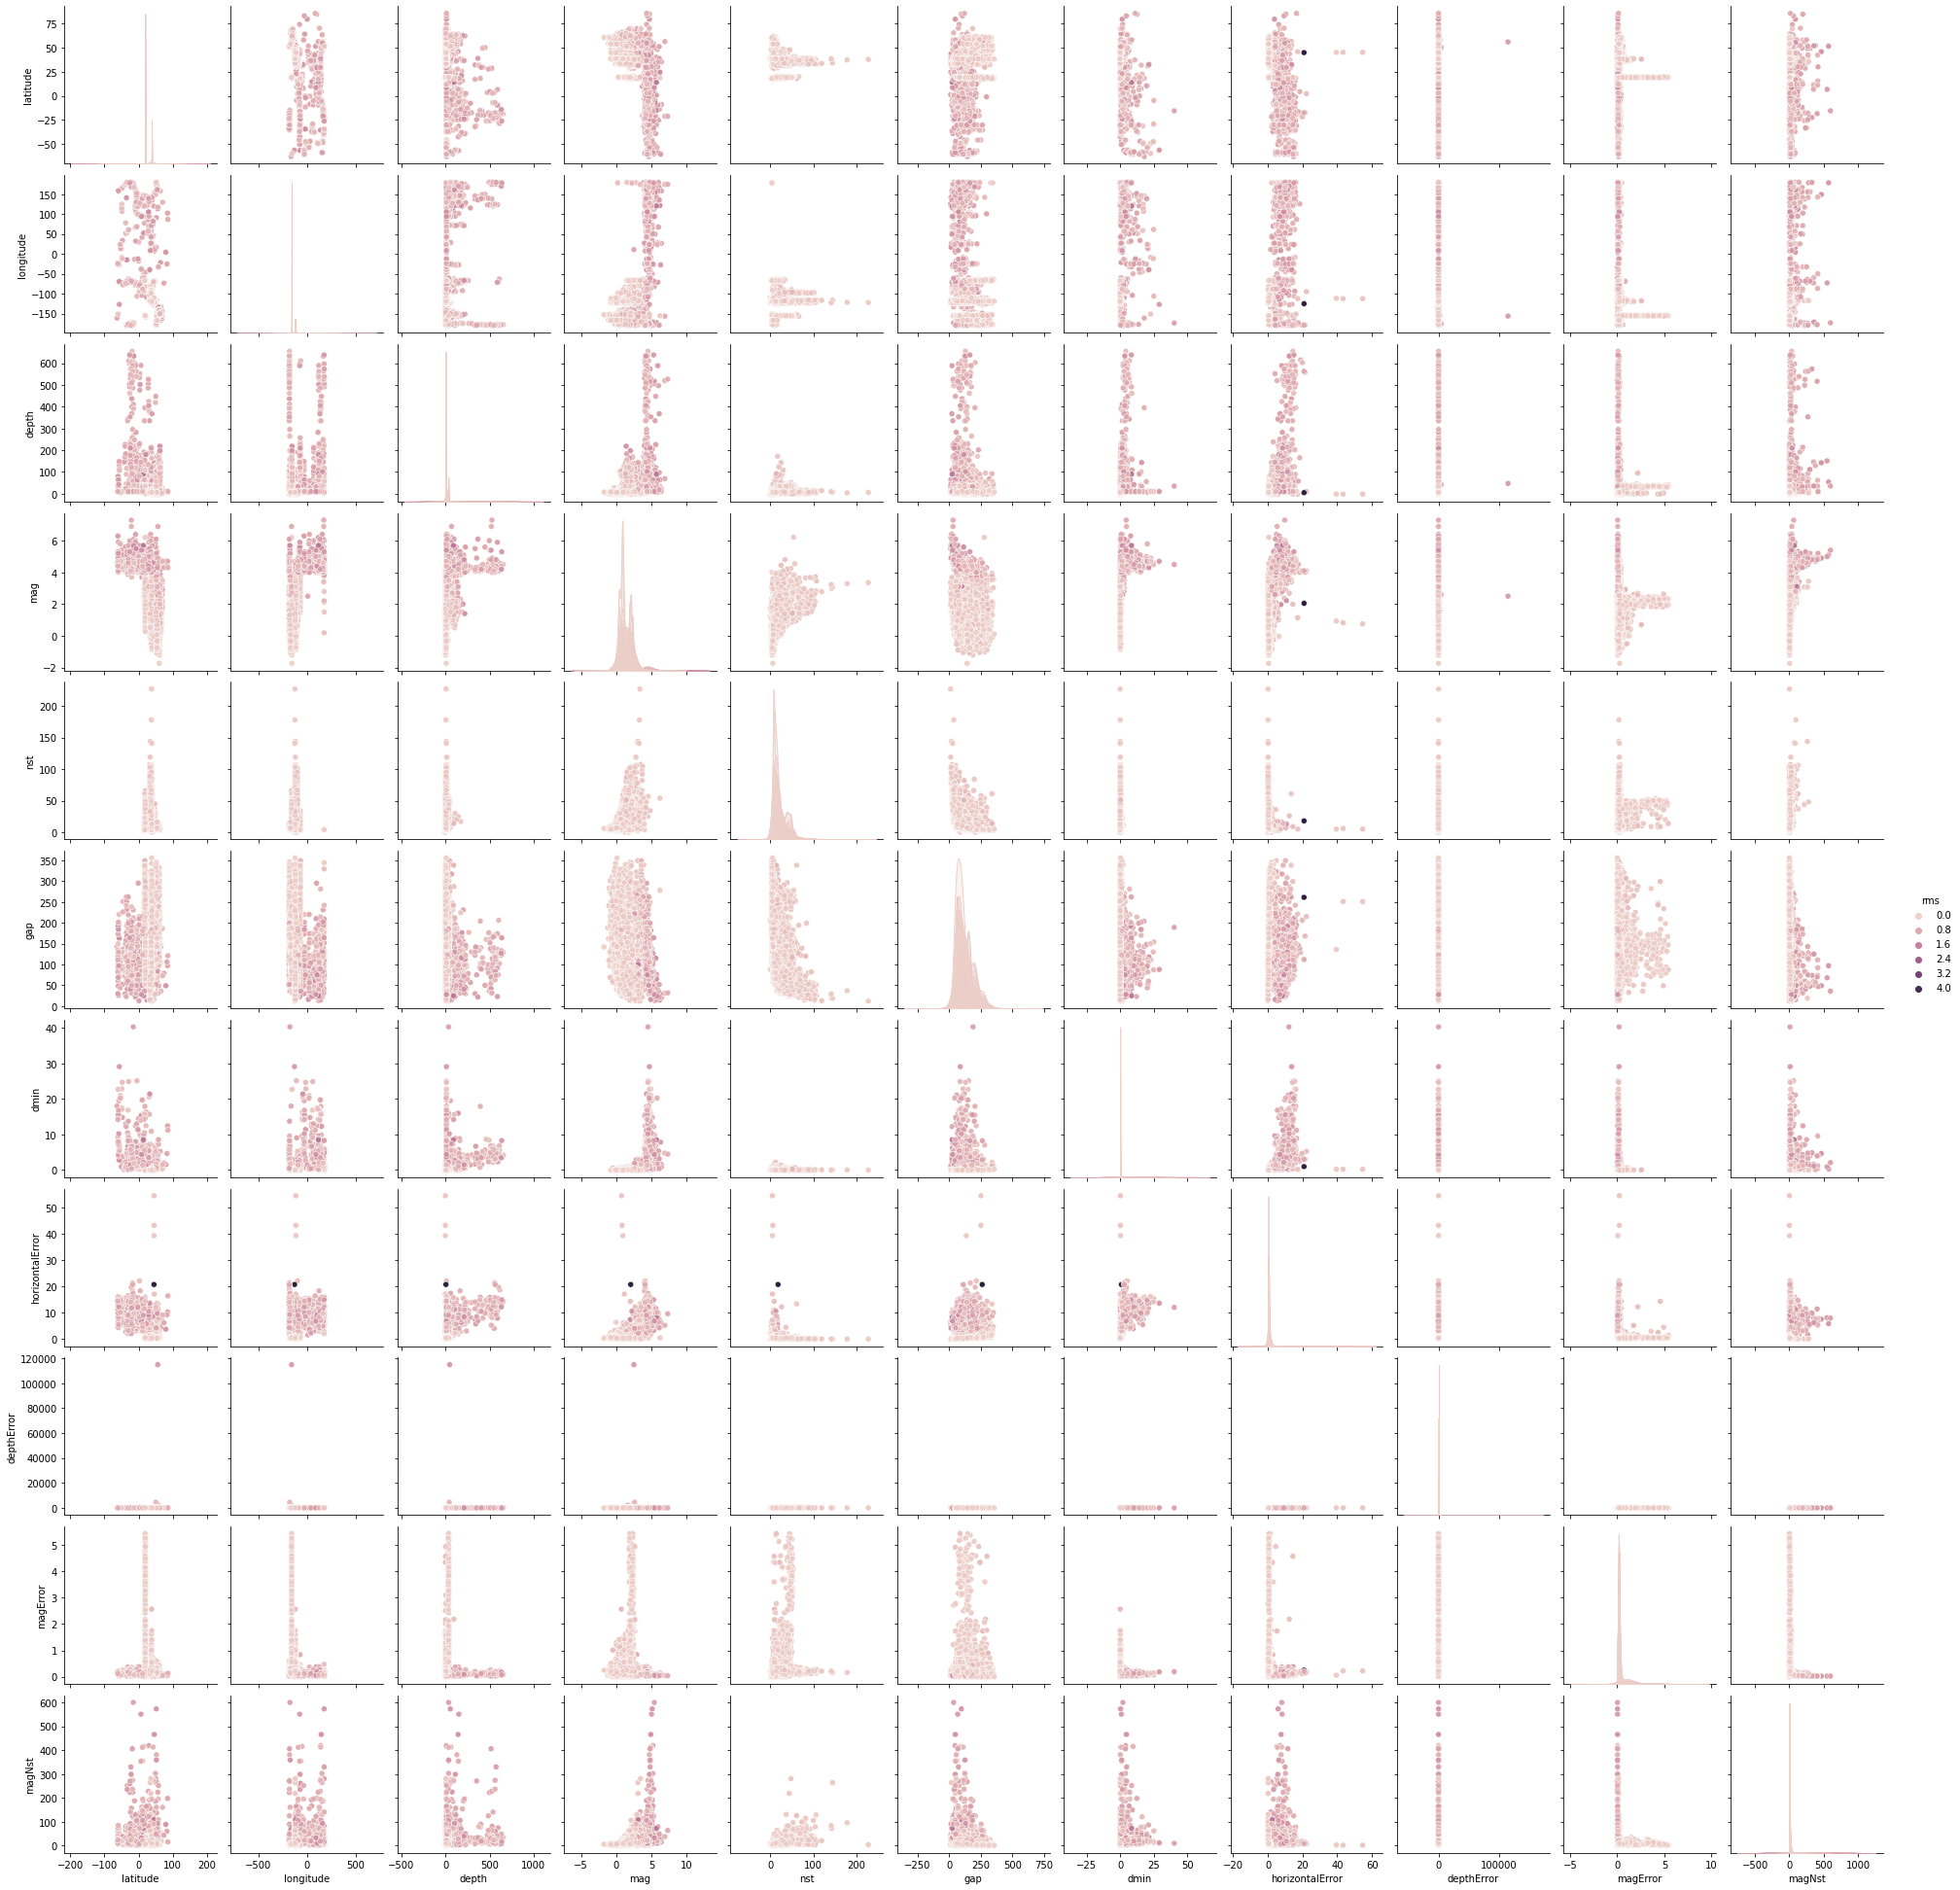

In [ ]:
g = sns.pairplot(df1, hue="rms")

Plot ini untuk mengetahui plot untuk masing-masing pasangan data numerik

#**Data Preprocessing**

Data preprocessing ini digunakan guna menyiapkan data untuk diklasifikasi menggunakan metode SVM(Hanya Contoh).

Setelah mengetahui hasil EDA di atas maka untuk hasil yang baik diperlukan beberapa hal sebagai berikut:
1. Menghapus kolom teks yang tidak diperlukan: **Name** dan **Ticket**
2. Mengisi NaN pada kolom **Cabin** dengan salah satu nama kabin tertentu*, mengisi NaN pada kolom **Age **dengan nilai rata-ratanya
3. Melakukan pengkodean(Encoding) pada kolom **Sex** , **Cabin**, dan **Embarked**
4. Menghapus outlier
5. Karena nilai data ada yang sangat besar dan kecil maka perlu dilakukan normalisasi

Setelah data diperbaiki dilakukan langkah sebagai berikut:
1. Memilih variabel independent dan label
2. Membagi data menjadi data training dan data testing


[Note] * Ini hanya contoh untuk melakukan pengisian data NaN(Kosong), nama kabin mungkin menjadi penting sehingga tidak segampang itu diganti

##Data Preparation

###Seleksi Kolom

In [ ]:
df=df.drop(columns=['depth', 'mag'])
df.head()

,time,latitude,longitude,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-10-24T07:46:44.980Z,38.160000,-118.209000,ml,9.0,171.25,0.12300,0.0948,nn,nn00826538,2021-10-24T07:50:24.747Z,"27 km SSW of Mina, Nevada",earthquake,NaN,36.00,0.37,5.0,automatic,nn,nn
1,2021-10-24T07:43:48.041Z,62.121600,-149.380700,ml,NaN,NaN,NaN,0.7300,ak,ak021dnb1ff9,2021-10-24T07:52:56.691Z,"24 km E of Susitna North, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2021-10-24T07:41:52.946Z,59.051800,-137.918900,ml,NaN,NaN,NaN,0.4500,ak,ak021dnb10ce,2021-10-24T07:48:15.762Z,"115 km WSW of Covenant Life, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
3,2021-10-24T07:15:04.860Z,36.826168,-121.425667,md,20.0,169.00,0.06291,0.1300,nc,nc73643975,2021-10-24T07:32:13.583Z,"3km SW of Hollister, CA",earthquake,0.67,0.74,0.16,14.0,automatic,nc,nc
4,2021-10-24T07:09:17.330Z,19.413834,-155.263840,ml,12.0,70.00,NaN,0.0600,hv,hv72767687,2021-10-24T07:14:48.460Z,"4 km SW of Volcano, Hawaii",earthquake,0.31,0.41,0.28,3.0,automatic,hv,hv


###Mengisis NaN

In [ ]:
df['depthError'].value_counts()

0.300000     375
0.400000     373
0.500000     279
0.600000     270
0.200000     254
            ... 
13.460000      1
3.210000       1
1.308941       1
3.382691       1
36.000000      1
Name: depthError, Length: 999, dtype: int64

In [ ]:
df['depthError'] = df['depthError'].replace(np.nan, "E49")
df.head()

,time,latitude,longitude,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-10-24T07:46:44.980Z,38.160000,-118.209000,ml,9.0,171.25,0.12300,0.0948,nn,nn00826538,2021-10-24T07:50:24.747Z,"27 km SSW of Mina, Nevada",earthquake,NaN,36,0.37,5.0,automatic,nn,nn
1,2021-10-24T07:43:48.041Z,62.121600,-149.380700,ml,NaN,NaN,NaN,0.7300,ak,ak021dnb1ff9,2021-10-24T07:52:56.691Z,"24 km E of Susitna North, Alaska",earthquake,NaN,0.4,NaN,NaN,automatic,ak,ak
2,2021-10-24T07:41:52.946Z,59.051800,-137.918900,ml,NaN,NaN,NaN,0.4500,ak,ak021dnb10ce,2021-10-24T07:48:15.762Z,"115 km WSW of Covenant Life, Alaska",earthquake,NaN,0.4,NaN,NaN,automatic,ak,ak
3,2021-10-24T07:15:04.860Z,36.826168,-121.425667,md,20.0,169.00,0.06291,0.1300,nc,nc73643975,2021-10-24T07:32:13.583Z,"3km SW of Hollister, CA",earthquake,0.67,0.74,0.16,14.0,automatic,nc,nc
4,2021-10-24T07:09:17.330Z,19.413834,-155.263840,ml,12.0,70.00,NaN,0.0600,hv,hv72767687,2021-10-24T07:14:48.460Z,"4 km SW of Volcano, Hawaii",earthquake,0.31,0.41,0.28,3.0,automatic,hv,hv


In [ ]:
df['magError']=df['magError'].fillna(df['magError'].mean())
df.head()

,time,latitude,longitude,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-10-24T07:46:44.980Z,38.160000,-118.209000,ml,9.0,171.25,0.12300,0.0948,nn,nn00826538,2021-10-24T07:50:24.747Z,"27 km SSW of Mina, Nevada",earthquake,NaN,36,0.370000,5.0,automatic,nn,nn
1,2021-10-24T07:43:48.041Z,62.121600,-149.380700,ml,NaN,NaN,NaN,0.7300,ak,ak021dnb1ff9,2021-10-24T07:52:56.691Z,"24 km E of Susitna North, Alaska",earthquake,NaN,0.4,0.298255,NaN,automatic,ak,ak
2,2021-10-24T07:41:52.946Z,59.051800,-137.918900,ml,NaN,NaN,NaN,0.4500,ak,ak021dnb10ce,2021-10-24T07:48:15.762Z,"115 km WSW of Covenant Life, Alaska",earthquake,NaN,0.4,0.298255,NaN,automatic,ak,ak
3,2021-10-24T07:15:04.860Z,36.826168,-121.425667,md,20.0,169.00,0.06291,0.1300,nc,nc73643975,2021-10-24T07:32:13.583Z,"3km SW of Hollister, CA",earthquake,0.67,0.74,0.160000,14.0,automatic,nc,nc
4,2021-10-24T07:09:17.330Z,19.413834,-155.263840,ml,12.0,70.00,NaN,0.0600,hv,hv72767687,2021-10-24T07:14:48.460Z,"4 km SW of Volcano, Hawaii",earthquake,0.31,0.41,0.280000,3.0,automatic,hv,hv


In [ ]:
df[['depthError','magError']].isnull().sum()

depthError    0
magError      0
dtype: int64

###Melakukan Pengkodean(Encoding)

In [ ]:
df['magType'].value_counts()

ml       5772
md       3337
mb        767
mww        67
mwr        19
mw         11
mh          5
mlr         2
mb_lg       1
mwb         1
Name: magType, dtype: int64

In [ ]:
df['status'].value_counts()

reviewed     6804
automatic    3179
Name: status, dtype: int64

In [ ]:
df['nst'].value_counts()

8.0      401
10.0     378
7.0      369
9.0      353
11.0     322
        ... 
91.0       1
106.0      1
88.0       1
102.0      1
144.0      1
Name: nst, Length: 106, dtype: int64

In [ ]:
#Encoding dengan data sedikit
cleanup_nums = {"magType":     {"mb": 1, "mwr": 2},
                "status": {"reviewed": 1, "automatic": 2}}
df = df.replace(cleanup_nums)
df.head()

,time,latitude,longitude,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-10-24T07:46:44.980Z,38.160000,-118.209000,ml,9.0,171.25,0.12300,0.0948,nn,nn00826538,2021-10-24T07:50:24.747Z,"27 km SSW of Mina, Nevada",earthquake,NaN,36,0.370000,5.0,2,nn,nn
1,2021-10-24T07:43:48.041Z,62.121600,-149.380700,ml,NaN,NaN,NaN,0.7300,ak,ak021dnb1ff9,2021-10-24T07:52:56.691Z,"24 km E of Susitna North, Alaska",earthquake,NaN,0.4,0.298255,NaN,2,ak,ak
2,2021-10-24T07:41:52.946Z,59.051800,-137.918900,ml,NaN,NaN,NaN,0.4500,ak,ak021dnb10ce,2021-10-24T07:48:15.762Z,"115 km WSW of Covenant Life, Alaska",earthquake,NaN,0.4,0.298255,NaN,2,ak,ak
3,2021-10-24T07:15:04.860Z,36.826168,-121.425667,md,20.0,169.00,0.06291,0.1300,nc,nc73643975,2021-10-24T07:32:13.583Z,"3km SW of Hollister, CA",earthquake,0.67,0.74,0.160000,14.0,2,nc,nc
4,2021-10-24T07:09:17.330Z,19.413834,-155.263840,ml,12.0,70.00,NaN,0.0600,hv,hv72767687,2021-10-24T07:14:48.460Z,"4 km SW of Volcano, Hawaii",earthquake,0.31,0.41,0.280000,3.0,2,hv,hv


In [ ]:
df["nst"] = df["nst"].astype('category')
df.dtypes

time                 object
latitude            float64
longitude           float64
magType              object
nst                category
gap                 float64
dmin                float64
rms                 float64
net                  object
id                   object
updated              object
place                object
type                 object
horizontalError     float64
depthError           object
magError            float64
magNst              float64
status                int64
locationSource       object
magSource            object
dtype: object

In [ ]:
#Encoding data dengan kategori sangat banyak
df["nst"] = df["nst"].cat.codes
df.head()

,time,latitude,longitude,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-10-24T07:46:44.980Z,38.160000,-118.209000,ml,7,171.25,0.12300,0.0948,nn,nn00826538,2021-10-24T07:50:24.747Z,"27 km SSW of Mina, Nevada",earthquake,NaN,36,0.370000,5.0,2,nn,nn
1,2021-10-24T07:43:48.041Z,62.121600,-149.380700,ml,-1,NaN,NaN,0.7300,ak,ak021dnb1ff9,2021-10-24T07:52:56.691Z,"24 km E of Susitna North, Alaska",earthquake,NaN,0.4,0.298255,NaN,2,ak,ak
2,2021-10-24T07:41:52.946Z,59.051800,-137.918900,ml,-1,NaN,NaN,0.4500,ak,ak021dnb10ce,2021-10-24T07:48:15.762Z,"115 km WSW of Covenant Life, Alaska",earthquake,NaN,0.4,0.298255,NaN,2,ak,ak
3,2021-10-24T07:15:04.860Z,36.826168,-121.425667,md,18,169.00,0.06291,0.1300,nc,nc73643975,2021-10-24T07:32:13.583Z,"3km SW of Hollister, CA",earthquake,0.67,0.74,0.160000,14.0,2,nc,nc
4,2021-10-24T07:09:17.330Z,19.413834,-155.263840,ml,10,70.00,NaN,0.0600,hv,hv72767687,2021-10-24T07:14:48.460Z,"4 km SW of Volcano, Hawaii",earthquake,0.31,0.41,0.280000,3.0,2,hv,hv


###Menghapus Outlier

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

Referensi: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [ ]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

latitude           11.720917
longitude          33.944950
nst                20.000000
gap                77.912500
dmin                0.133650
rms                 0.270000
horizontalError     0.670000
magError            0.168255
magNst             11.000000
status              1.000000
dtype: float64


In [ ]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,time,latitude,longitude,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-10-24T07:46:44.980Z,38.160000,-118.209000,ml,7,171.25,0.123000,0.0948,nn,nn00826538,2021-10-24T07:50:24.747Z,"27 km SSW of Mina, Nevada",earthquake,NaN,36,0.370000,5.0,2,nn,nn
1,2021-10-24T07:43:48.041Z,62.121600,-149.380700,ml,-1,NaN,NaN,0.7300,ak,ak021dnb1ff9,2021-10-24T07:52:56.691Z,"24 km E of Susitna North, Alaska",earthquake,NaN,0.4,0.298255,NaN,2,ak,ak
2,2021-10-24T07:41:52.946Z,59.051800,-137.918900,ml,-1,NaN,NaN,0.4500,ak,ak021dnb10ce,2021-10-24T07:48:15.762Z,"115 km WSW of Covenant Life, Alaska",earthquake,NaN,0.4,0.298255,NaN,2,ak,ak
3,2021-10-24T07:15:04.860Z,36.826168,-121.425667,md,18,169.00,0.062910,0.1300,nc,nc73643975,2021-10-24T07:32:13.583Z,"3km SW of Hollister, CA",earthquake,0.67,0.74,0.160000,14.0,2,nc,nc
4,2021-10-24T07:09:17.330Z,19.413834,-155.263840,ml,10,70.00,NaN,0.0600,hv,hv72767687,2021-10-24T07:14:48.460Z,"4 km SW of Volcano, Hawaii",earthquake,0.31,0.41,0.280000,3.0,2,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,2021-09-24T08:21:46.230Z,53.844000,-166.849500,ml,4,148.00,NaN,0.2000,av,av91041678,2021-09-24T21:16:10.840Z,"20 km WSW of Dutch Harbor, Alaska",earthquake,0.58,1.32,0.112151,5.0,1,av,av
9976,2021-09-24T08:21:12.840Z,53.841667,-166.866000,ml,3,163.00,NaN,0.1200,av,av91041683,2021-09-24T21:19:49.830Z,"21 km WSW of Dutch Harbor, Alaska",earthquake,0.65,1.2,0.208434,5.0,1,av,av
9978,2021-09-24T08:18:37.662Z,62.257700,-150.380600,ml,-1,NaN,NaN,0.4800,ak,ak021c9pd2h0,2021-10-21T17:40:11.614Z,"10 km SW of Trapper Creek, Alaska",earthquake,NaN,0.2,0.298255,NaN,1,ak,ak
9980,2021-09-24T08:16:21.640Z,53.847833,-166.844167,ml,5,143.00,NaN,0.1600,av,av91381486,2021-09-24T21:13:10.070Z,"20 km WSW of Dutch Harbor, Alaska",earthquake,0.41,0.97,0.161590,7.0,1,av,av


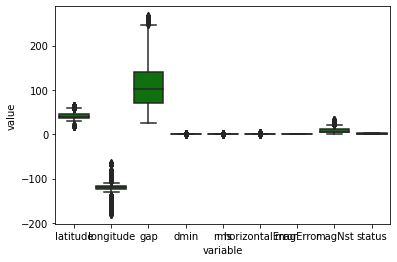

In [ ]:
#Melihat Outlier
df1=df_clear.select_dtypes(include=['float64','int64'])
sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))

plt.show()

Outlier berhasil dihapus

# Data Visualization

## Plotly

Plotly adalah salah satu modul untuk visualisasi pada python. Modul ini memiliki kelebihan untuk membuat visualisasi data yang interaktif. Informasi lengkap mengenai modul ini bisa diperoleh di link di bawah ini:

https://plotly.com/python/basic-charts/

Modul lain untuk visualisasi yang biasa digunakan adalah Matplotlib dan Seaborn. Keduanya adalah modul visualisasi yang tidak interaktif. Kemudian, perlu diketahui juga bahwa Seaborn dibangun berdasarkan Matplotlib, sehingga Seaborn merupakan modul Matplotlib yang lebih advance.

In [ ]:
#Import Modul PloltLy Express
import plotly.express as px

##Scater Plot

Scatter Plot adalah plot berupa titik-titik data dalam dimensi 2 ataupun 3. Tujuan melakukan plot dalam bentuk ini adalah melihat sebaran data, melihat pola-pola sebaran data dalam bentuk kelompok, bisa juga untuk melihat pola keterkaitan(korelasi), ataupun kedekatan antar titik data. Pada modul ini kita akan mempelajari visualisasi data untuk 2 dimensi dulu.

Secara umum, susunan sytax untuk Scater Plot pada Modul PlotLy adalah sebagai berikut:

Visualisasi data 2 list (list sumbu x dan list sumbu y
```
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], 
                 y=[0, 1, 4, 9, 16])
fig.show()
```

Visualisasi data 2 list dalam DataFrame

```
fig = px.scatter(df,                       #DataFrame yang akan di plot
                 x="sepal_width",          #Data untuk sumbu X
                 y="sepal_length"         #Data untuk sumbu Y
                 )
```




In [ ]:
import plotly.express as px
import pandas as pd
#Menyiapkan Data
df = pd.read_csv('/content/LAST_30_DAYS_EARTHQUAKES.csv')
df['latitude'] = df['latitude'].astype('string')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-10-24T07:46:44.980Z,38.16,-118.209000,4.200000,0.60,ml,9.0,171.25,0.123000,0.0948,nn,nn00826538,2021-10-24T07:50:24.747Z,"27 km SSW of Mina, Nevada",earthquake,NaN,36.00,0.37000,5.0,automatic,nn,nn
1,2021-10-24T07:43:48.041Z,62.1216,-149.380700,13.800000,2.50,ml,NaN,NaN,NaN,0.7300,ak,ak021dnb1ff9,2021-10-24T07:52:56.691Z,"24 km E of Susitna North, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2021-10-24T07:41:52.946Z,59.0518,-137.918900,2.600000,2.20,ml,NaN,NaN,NaN,0.4500,ak,ak021dnb10ce,2021-10-24T07:48:15.762Z,"115 km WSW of Covenant Life, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
3,2021-10-24T07:15:04.860Z,36.826168100000004,-121.425667,10.150000,1.54,md,20.0,169.00,0.062910,0.1300,nc,nc73643975,2021-10-24T07:32:13.583Z,"3km SW of Hollister, CA",earthquake,0.67,0.74,0.16000,14.0,automatic,nc,nc
4,2021-10-24T07:09:17.330Z,19.4138336181641,-155.263840,3.160000,1.71,ml,12.0,70.00,NaN,0.0600,hv,hv72767687,2021-10-24T07:14:48.460Z,"4 km SW of Volcano, Hawaii",earthquake,0.31,0.41,0.28000,3.0,automatic,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,2021-09-24T08:18:37.662Z,62.2577,-150.380600,57.500000,2.00,ml,NaN,NaN,NaN,0.4800,ak,ak021c9pd2h0,2021-10-21T17:40:11.614Z,"10 km SW of Trapper Creek, Alaska",earthquake,NaN,0.20,NaN,NaN,reviewed,ak,ak
9979,2021-09-24T08:16:39.283Z,51.4274,179.742100,57.200000,1.50,ml,NaN,NaN,NaN,0.2000,ak,ak021c9pcn6g,2021-10-21T17:40:31.733Z,"255 km WSW of Adak, Alaska",earthquake,NaN,1.20,NaN,NaN,reviewed,ak,ak
9980,2021-09-24T08:16:21.640Z,53.8478333333333,-166.844167,6.260000,0.07,ml,7.0,143.00,NaN,0.1600,av,av91381486,2021-09-24T21:13:10.070Z,"20 km WSW of Dutch Harbor, Alaska",earthquake,0.41,0.97,0.16159,7.0,reviewed,av,av
9981,2021-09-24T08:14:05.440Z,19.166166305542,-155.469330,34.709999,1.95,md,37.0,84.00,NaN,0.1100,hv,hv72722702,2021-09-24T08:17:21.340Z,"4 km SSE of Pāhala, Hawaii",earthquake,0.55,0.85,0.57000,7.0,automatic,hv,hv


In [ ]:
#Membuat Plot Scatter
fig = px.scatter(df,
                 x = "latitude",
                 y = "mag"
                 )

fig.update_layout(
    title = 'Iris Dataset',
    title_font_color = 'Blue',
    title_font_size = 30,

    xaxis = dict(
        title = 'Ssc p',
        titlefont_size = 16,
        tickfont_size = 14),
    yaxis = dict(
        title = 'Ssc p',
        titlefont_size = 16,
        tickfont_size = 14))

fig.show()
